# CPNatal 2018

### Web Crawlers: Acessando Websites e Rede Sociais com Python
### Gileno Alves Santa Cruz Filho

### Gileno, quem?

![foto-bairrorecife.jpg](foto-bairrorecife.jpg)

![pycursos-logo.png](pycursos-logo.png)

![logo_pug.jpg](logo_pug.jpg)

## Informação é Poder

### Mais existe muita informação

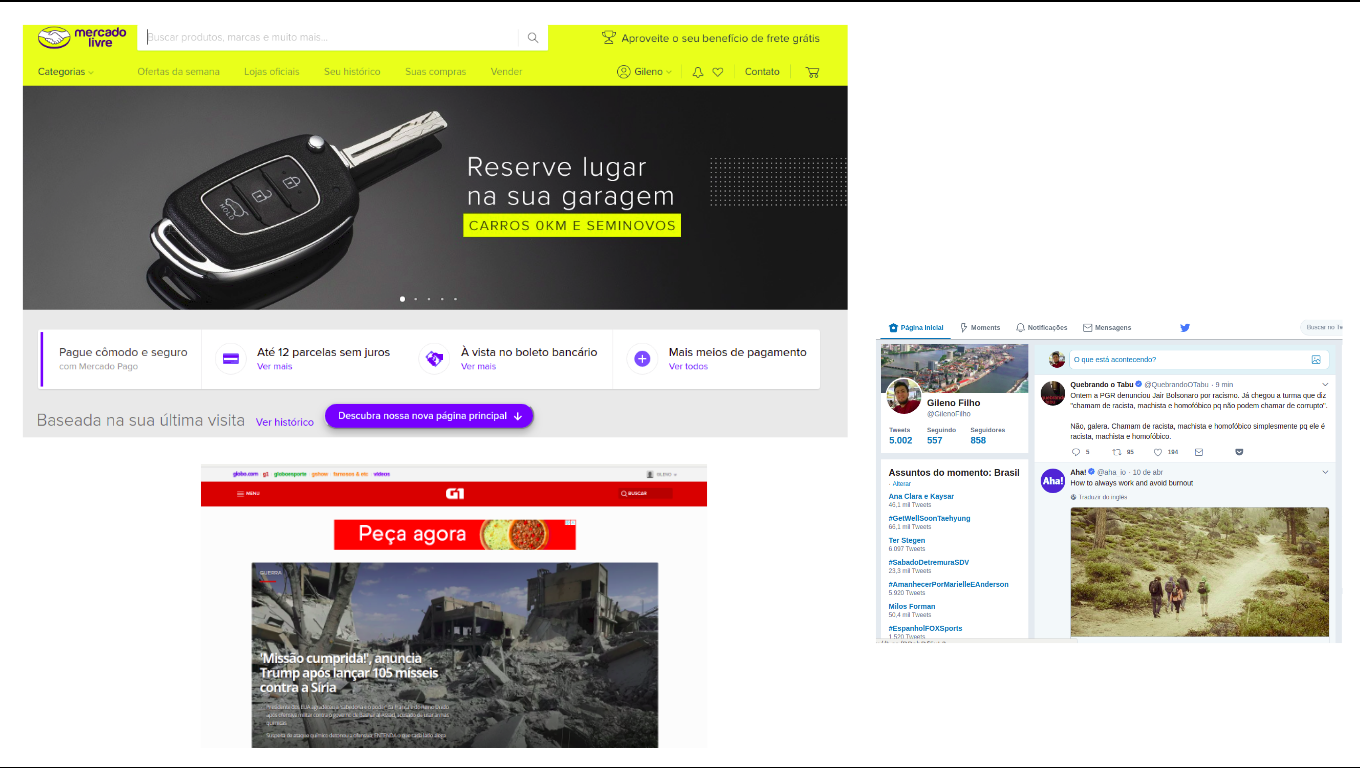

In [1]:
import requests_html
session = requests_html.HTMLSession()

In [2]:
r = session.get("https://www.python.org")
print(r.text)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

In [3]:
# Megasena
url = 'http://www1.caixa.gov.br/loterias/loterias/megasena/megasena_pesquisa_new.asp'
r = session.get(url)
lista = r.html.find('ul')[0]
for li in lista.find("li"):
    print(li.text)

38
04
58
40
27
59


In [5]:
# OLX
url = 'http://rn.olx.com.br/videogames'
r = session.get(url)
links = r.html.xpath("//a[contains(@class, 'OLXad-list-link')]")
for link in links:
    url_detalhes = link.attrs['href']
    print(url_detalhes)
    r_detalhes = session.get(url_detalhes)
    titulo = r_detalhes.html.xpath("//*[@id='ad_title']/text()")[0].strip()
    try:
        preco = r_detalhes.html.xpath("//*[@class='OLXad-price']/text()")[0].strip()
    except:
        preco = ''
    print(titulo, preco)

http://rn.olx.com.br/rio-grande-do-norte/videogames/xbox-troco-em-celular-472109796
Xbox troco em celular 
http://rn.olx.com.br/rio-grande-do-norte/videogames/vendo-ps2-desbloqueado-472106500
Vendo ps2 desbloqueado R$ 270
http://rn.olx.com.br/rio-grande-do-norte/videogames/vendo-um-xbox-360-bem-conservador-4g-desbloqueado-3-0-leia-a-descricao-472101600
Vendo um Xbox 360 bem conservador 4g desbloqueado 3.0 leia a descrição R$ 400
http://rn.olx.com.br/rio-grande-do-norte/videogames/vendo-estes-dois-jogos-472102095
Vendo estes dois jogos R$ 60
http://rn.olx.com.br/rio-grande-do-norte/videogames/metal-gear-solid-4-e-5-em-otimas-condicoes-472100909
Metal Gear Solid 4 e 5 em otimas condições R$ 90
http://rn.olx.com.br/rio-grande-do-norte/videogames/vendo-ou-troco-ps2-472099899
Vendo Ou Troco Ps2 R$ 250
http://rn.olx.com.br/rio-grande-do-norte/videogames/troco-horizon-472098053
Troco Horizon R$ 90
http://rn.olx.com.br/rio-grande-do-norte/videogames/vendo-ou-troco-ps2-472099107
Vendo Ou Troco 

In [6]:
# API's
import tokens

In [7]:
# Marvel
import hashlib
import pprint

url = 'http://gateway.marvel.com/v1/public/characters'
HASH = '1' + tokens.MARVEL_PRIVATE_KEY + tokens.MARVEL_PUBLIC_KEY
HASH = hashlib.md5(HASH.encode("utf8")).hexdigest()
r = session.get(url, params={'ts': 1, 'apikey': tokens.MARVEL_PUBLIC_KEY, 'hash': HASH})
pprint.pprint(r.json())

{'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © '
                    '2018 MARVEL</a>',
 'attributionText': 'Data provided by Marvel. © 2018 MARVEL',
 'code': 200,
 'copyright': '© 2018 MARVEL',
 'data': {'count': 20,
          'limit': 20,
          'offset': 0,
          'results': [{'comics': {'available': 12,
                                  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011334/comics',
                                  'items': [{'name': 'Avengers: The Initiative '
                                                     '(2007) #14',
                                             'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21366'},
                                            {'name': 'Avengers: The Initiative '
                                                     '(2007) #14 (SPOTLIGHT '
                                                     'VARIANT)',
                                             'resourceU

                                             'resourceURI': 'http://gateway.marvel.com/v1/public/comics/1023'},
                                            {'name': 'X-Man (1995) #-1',
                                             'resourceURI': 'http://gateway.marvel.com/v1/public/comics/18176'}],
                                  'returned': 20},
                       'description': '',
                       'events': {'available': 0,
                                  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009150/events',
                                  'items': [],
                                  'returned': 0},
                       'id': 1009150,
                       'modified': '1969-12-31T19:00:00-0500',
                       'name': 'Agent Zero',
                       'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009150',
                       'series': {'available': 9,
                                  'collectionURI': 'h

In [8]:
# Marvel
import hashlib
import pprint

url = 'http://gateway.marvel.com/v1/public/characters'
HASH = '1' + tokens.MARVEL_PRIVATE_KEY + tokens.MARVEL_PUBLIC_KEY
HASH = hashlib.md5(HASH.encode("utf8")).hexdigest()
r = session.get(
    url, params={'ts': 1, 'apikey': tokens.MARVEL_PUBLIC_KEY, 'hash': HASH, 'name': 'Spider-Man'}
)
pprint.pprint(r.json())

{'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © '
                    '2018 MARVEL</a>',
 'attributionText': 'Data provided by Marvel. © 2018 MARVEL',
 'code': 200,
 'copyright': '© 2018 MARVEL',
 'data': {'count': 1,
          'limit': 20,
          'offset': 0,
          'results': [{'comics': {'available': 3187,
                                  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009610/comics',
                                  'items': [{'name': 'Spider-Man: 101 Ways to '
                                                     'End the Clone Saga '
                                                     '(1997) #1',
                                             'resourceURI': 'http://gateway.marvel.com/v1/public/comics/62304'},
                                            {'name': 'A Year of Marvels (Trade '
                                                     'Paperback)',
                                             'resourceURI

In [9]:
# Twitter
from tapioca_twitter import Twitter

In [10]:
api_twitter = Twitter(
    api_key=tokens.TWITTER_API_KEY,
    api_secret=tokens.TWITTER_API_SECRET,
    access_token=tokens.TWITTER_ACCESS_TOKEN,
    access_token_secret=tokens.TWITTER_ACCESS_SECRET
)

In [11]:
resultado = api_twitter.statuses_home_timeline().get()
for tweet in resultado().data:
    print(tweet['text'])

Deciphering Big Decisions: A Road-map for Data-Driven Organizations https://t.co/IBe78aP9zE
Que condições madame? https://t.co/nQtFE6X6C7
Esse que pediu confiança é um mais que sonhatico.

Confiança é uma construção de longo prazo.
Tirinha de hoje: Parasitas &gt;&gt; https://t.co/DhJAgRJaiA https://t.co/75t5LOA87B
Want to be a great leader? Hire people who argue with you. https://t.co/Bw1gQVtetv
9...
RT @Janielly82: #UFCnoCombate
Julia &amp; Carlinhos  OSS
Gravatá/PE 🇧🇷 https://t.co/Ha3C8i4vbk
Novo Bioshock pode estar em desenvolvimento https://t.co/4w1UWZf5aw https://t.co/mgfQn3fGZT
@Werberthgomes Rapaz, garra, não vai faltar. Ele é decisivo, faz gol em jogo importante. É bastante regular. Agora… https://t.co/eMy93yzFDv
Isso ai! Resumiu bem, peça desculpas, não licença!
Tem torcedor do Íbis no jogão barça x Pernambuco Legends. 😄👏🏼👏🏼 @centauroesporte #BarçaNaCentauro https://t.co/zNZcO3xCws
Não sei se isso presta @_heloisa_helena 

https://t.co/IydcbaWHke
Primeira luta feminina do card

In [12]:
tweets = api_twitter.search_tweets().get(params={'q': '#CPNatal'})
for tweet in tweets().data['statuses']:
    print(tweet['text'])

Melhor presente de aniversário pra mim mesmo ter comprado essa entrada com camping pra curtir a #CPNatal #CPJerimum. https://t.co/bgie4DlO33
Campuseiros cansados no penúltimo dia de Campus Party. Só TNT para dar conta de tanto conteúdo bom. #obligado… https://t.co/b1Vkw4sUMj
A #CPNatal fica completa c/ o @instagram da @CampusPartyBRA https://t.co/zgRtgXjD8D c/ imagens incríveis, e da Turm… https://t.co/SLlc8NZTFt
RT @tacianosilva: Valeu Galera do @bsiufrn! Foi ótima a Campus Party Natal #CPNatal #CPJerimum @CampusPartyBRA #natal https://t.co/KPmMx6DU…
Valeu Galera do @bsiufrn! Foi ótima a Campus Party Natal #CPNatal #CPJerimum @CampusPartyBRA #natal https://t.co/KPmMx6DUv6
RT @limasigor2: Uma das coisas mais legais da #CPNatal é ver as oficinas de programação pra quem não é  programador, a pessoa vem pelo cult…
Tá rolando torneio de #LoL na #cpnatal 

#NERDestinos https://t.co/diPEbRrACG
"Dois drones entram, um crime sai!"

Tá rolando batalha de drones!!

#NERDestinos #cpnatal https://

In [13]:
status = 'Palestrando na #CPNatal sobre WebCrawlers e API com Python'
statuses_update = api_twitter.statuses_update().post(params={'status': status})
print(statuses_update().data)

{'created_at': 'Sat Apr 14 21:24:43 +0000 2018', 'id': 985267629987454976, 'id_str': '985267629987454976', 'text': 'Palestrando na #CPNatal sobre WebCrawlers e API com Python', 'truncated': False, 'entities': {'hashtags': [{'text': 'CPNatal', 'indices': [15, 23]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://gilenofilho.com.br" rel="nofollow">Gileno Filho</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 66525995, 'id_str': '66525995', 'name': 'Gileno Filho', 'screen_name': 'GilenoFilho', 'location': 'Recife - Brazil', 'description': 'Co-Fundador do PyCursos com interesses em: Python, Django, Usabilidade, Minimalismo, Engenharia de Avaliações e IA', 'url': 'http://t.co/Vt8OsvjHJ7', 'entities': {'url': {'urls': [{'url': 'http://t.co/Vt8OsvjHJ7', 'expanded_url': 'http://gilenofilho.com.br', 'display_url': 'gilenofilho.com.br',

In [14]:
# Facebook
from tapioca_facebook import Facebook

api_facebook = Facebook(
    client_id=tokens.FACEBOOK_CLIENT_ID, access_token=tokens.FACEBOOK_ACCESS_TOKEN
)

In [15]:
likes = api_facebook.user_likes(id='me').get()
for like in likes().data:
    print(like) 

data
paging


In [16]:
likes().data['paging']

{'cursors': {'after': 'MTgxMDEwNDI5MDI3MTEz',
  'before': 'MzU2NzYwMTU4MDY0NzA0'},
 'next': 'https://graph.facebook.com/v2.6/998082550203894/likes?limit=25&after=MTgxMDEwNDI5MDI3MTEz'}

In [17]:
for like in likes().pages():
    print(like().data)

{'name': 'Trello', 'id': '825878174157096', 'created_time': '2018-04-02T22:05:19+0000'}
{'name': 'Jorge Guerra', 'id': '245119319364429', 'created_time': '2018-03-29T04:49:31+0000'}
{'name': 'Obras literárias com capas de memes genuinamente brasileiros', 'id': '428304420845648', 'created_time': '2018-03-26T19:05:37+0000'}
{'name': 'Sassa Oliveira Vicente', 'id': '179361879351218', 'created_time': '2018-03-12T14:44:49+0000'}
{'name': 'SuperesportesPE', 'id': '199538880093235', 'created_time': '2018-03-02T23:39:14+0000'}
{'name': 'Choque de Cultura', 'id': '1866380196931766', 'created_time': '2018-03-01T22:12:42+0000'}
{'name': 'Rafael Vitureira', 'id': '271399766726780', 'created_time': '2018-02-01T15:12:33+0000'}
{'name': 'Nerdonautas', 'id': '203952256473306', 'created_time': '2018-01-22T20:37:07+0000'}
{'name': 'BuzzFeed Brasil', 'id': '1412406255640941', 'created_time': '2018-01-17T22:01:20+0000'}
{'name': 'Rodrigo Marques', 'id': '215806361887891', 'created_time': '2018-01-13T18:51

{'name': 'Deboísmo', 'id': '774696909295779', 'created_time': '2016-05-30T12:07:17+0000'}
{'name': 'Anonymous Brasil', 'id': '276935342355328', 'created_time': '2016-05-27T23:04:26+0000'}
{'name': 'Júlio César - Consultoria em Machine Learning', 'id': '697412550348388', 'created_time': '2016-05-24T11:13:58+0000'}
{'name': 'Uber', 'id': '540381526073012', 'created_time': '2016-05-16T17:51:58+0000'}
{'name': 'Trampolim Academy', 'id': '1684782571800628', 'created_time': '2016-05-13T00:31:34+0000'}
{'name': 'UI Lab', 'id': '1627898694146917', 'created_time': '2016-05-05T16:04:18+0000'}
{'name': 'Movimento Pró-Corrupção', 'id': '373717796027730', 'created_time': '2016-03-12T17:11:04+0000'}
{'name': 'Tastemade Brasil', 'id': '768053913287830', 'created_time': '2016-03-07T17:46:32+0000'}
{'name': 'Empreendedor Óbvio', 'id': '1128377067202644', 'created_time': '2016-03-03T19:36:03+0000'}
{'name': 'Manguez.al', 'id': '169307593159644', 'created_time': '2016-02-03T11:40:19+0000'}
{'name': 'SA36

{'name': 'Python programming language', 'id': '115046328508678', 'created_time': '2015-04-09T22:10:43+0000'}
{'name': 'Murilo Gun', 'id': '264432573188', 'created_time': '2015-04-09T22:10:43+0000'}
{'name': 'Cursos sobre análise de dados para profissionais de TI', 'id': '665925543417577', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'EstudePy', 'id': '546539945384370', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'Say2me', 'id': '462237757135795', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'Opera na Campus Party', 'id': '370209419674942', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'IxDA Recife', 'id': '246252338743363', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'Teste Vocacional Online', 'id': '226849860697436', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'Vida de Suporte', 'id': '215431471814256', 'created_time': '2015-04-09T22:10:42+0000'}
{'name': 'Burger King Brasil', 'id': '209999859022356', 'created_time': '2015-04-09T22:10:

In [18]:
feed = api_facebook.user_feed(id='me').get()
for post in feed().pages():
    print(post().data)

{'message': 'Aquele peixe que você respeita', 'story': 'Gileno Filho added 3 new photos — in Manaus, Brazil.', 'created_time': '2018-02-23T23:16:24+0000', 'id': '998082550203894_2009389899073149'}
{'story': "Gileno Filho shared Bastidores's video.", 'created_time': '2018-01-26T18:58:02+0000', 'id': '998082550203894_1974006919278114'}
{'story': "Gileno Filho shared Rodrigo Marques's video.", 'created_time': '2018-01-13T18:51:33+0000', 'id': '998082550203894_1957534917591981'}
{'story': "Gileno Filho shared Orquestra Royal's video.", 'created_time': '2018-01-11T19:50:30+0000', 'id': '998082550203894_1955325794479560'}
{'message': 'Pyselfie no Pypudinhos de final de ano!', 'story': 'Luiz Felipe Sotero is with Filipe Ximenes and 2 others.', 'created_time': '2017-12-21T02:00:42+0000', 'id': '100000088652818_1788790844467187'}
{'message': 'Desliga o secador que não adiantou de nada #Sport #SerieA', 'created_time': '2017-12-03T21:08:12+0000', 'id': '998082550203894_1907704312575042'}
{'messag

{'message': 'Thunder, thunder, thunder, Thundercats hoooooooo', 'story': 'Gileno Filho is at Condominio do Edificio Castelo de Renoir.', 'created_time': '2017-02-26T01:52:14+0000', 'id': '998082550203894_1543470725665071'}
{'message': 'Traz Bolo de Rolo :)', 'created_time': '2017-02-24T00:37:21+0000', 'id': '998082550203894_1540851092593701'}
{'story': "Gileno Filho shared Capinaremos's photo.", 'created_time': '2017-02-23T04:12:20+0000', 'id': '998082550203894_1539547726057371'}
{'message': 'So as ofertas free do packtpub...', 'story': "Gileno Filho shared Bugginho Developer's photo.", 'created_time': '2017-02-20T01:20:02+0000', 'id': '998082550203894_1535730026439141'}
{'message': 'Novidades: esse mês será lançado um curso na Udemy de Machine Learning para Iniciantes com Python. No curso serão usados Pandas, NumPy, Matplotlib e scikit-learn. Serão dois instrutores: eu e Gileno Filho. Aguardem a promoção especial :)', 'story': 'Marcos Castro de Souza updated his status.', 'created_tim

{'story': 'Gileno Filho updated his profile picture.', 'created_time': '2016-10-11T16:23:53+0000', 'id': '998082550203894_1362403837105095'}
{'story': 'Gileno Filho updated his cover photo.', 'created_time': '2016-10-11T16:17:18+0000', 'id': '998082550203894_1362398960438916'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2016-10-09T00:46:00+0000', 'id': '998082550203894_1359628557382623'}
{'message': 'Salão de Artes e Ciências do colégio visão', 'story': 'Gileno Filho is at Colégio Visão Oficial.', 'created_time': '2016-10-08T16:57:06+0000', 'id': '998082550203894_1359282457417233'}
{'message': 'Também conhecido como Reforço positivo', 'story': "Gileno Filho shared Quebrando o Tabu's photo.", 'created_time': '2016-10-03T16:58:56+0000', 'id': '998082550203894_1353691491309663'}
{'message': 'Michelle Cruz Leandro Cunha Carol Lima Ruana Sales Gutemberg Borba', 'story': "Gileno Filho shared Brega Bregoso's video.", 'created_time': '2016-09-26T18:48:32+0000', 'id': '99808255020

{'message': '80% Isentão e aqueles 20% distribuídos', 'created_time': '2016-04-06T18:24:57+0000', 'id': '998082550203894_1202079056470908'}
{'story': 'Gileno Filho updated his profile picture.', 'created_time': '2016-04-04T00:09:25+0000', 'id': '998082550203894_1200111376667676'}
{'story': "Gileno Filho shared Armandinho's photo.", 'created_time': '2016-03-31T11:04:37+0000', 'id': '998082550203894_1196973956981418'}
{'message': 'Esse GIF mostra de fato o que está acontecendo com o Brasil asudausdha', 'created_time': '2016-03-22T12:07:49+0000', 'id': '998082550203894_1186863111325836'}
{'message': 'Eu podia estar defendendo os Coxinhas, podia estar defendendo os PTralhas, mas estou aqui chamando vocês para o evento mais democrático de Pernambuco, o 43º Encontro do Grupo de Usuários de Python de Pernambuco (PUG-PE) que irá acontecer próximo sábado no CIn - Centro de Informática (UFPE)\n\nFaltou o link: ', 'created_time': '2016-03-17T12:07:40+0000', 'id': '998082550203894_1182422561769891

{'message': 'O pessoal que compara MMA aos Gladiadores são no mínimo inocentes, contextos e propósitos diferentes: o fato de ter dinheiro e luta não significa que é um circo do governo.\nPela violência, basta ver um jogo de futebol e as lesões dos atletas, passam mais tempo fora do que atletas de MMA. Além do mais eu queria ver atletas de futebol se cumprimentar e serem gentis após uma final como é no MMA.\nEu acho que é um esporte como qualquer outro só que expõe mais nosso lado selvagem do que em outros esportes e por isso sofre preconceito, mas ainda sim eu não entendo qual o graça e/ou diversão de criticá-lo', 'created_time': '2015-12-13T14:08:57+0000', 'id': '998082550203894_1123271504351664'}
{'message': 'Maratona de Stars Wars do Telecine finalizando agora, era uma vez Anakin :(', 'created_time': '2015-12-13T04:21:19+0000', 'id': '998082550203894_1123030901042391'}
{'message': 'Michelle Cruz', 'created_time': '2015-12-12T13:28:57+0000', 'id': '998082550203894_1122671047745043'}


{'message': 'Coroa do avião #relaxando', 'story': 'Gileno Filho is with Michelle Cruz at Corôa Do Avião.', 'created_time': '2015-09-05T17:21:58+0000', 'id': '998082550203894_1074944732517675'}
{'story': "Gileno Filho shared Bugginho Developer's photo.", 'created_time': '2015-09-04T16:06:47+0000', 'id': '998082550203894_1074248789253936'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2015-09-01T12:36:53+0000', 'id': '998082550203894_1072181032794045'}
{'message': 'Soninho tranquilo das crianças', 'created_time': '2015-08-27T02:03:34+0000', 'id': '998082550203894_1068651133147035'}
{'message': 'Trabalhando em casa...', 'created_time': '2015-08-24T20:33:10+0000', 'id': '998082550203894_1067456713266477'}
{'story': "Gileno Filho shared Bugginho Developer's photo.", 'created_time': '2015-08-19T18:56:19+0000', 'id': '998082550203894_1064855010193314'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2015-08-18T19:38:02+0000', 'id': '998082550203894_1064260230252792'}
{'s

{'story': 'Gileno Filho shared a link.', 'created_time': '2013-10-12T15:22:48+0000', 'id': '998082550203894_695083937170425'}
{'created_time': '2013-10-10T20:40:07+0000', 'id': '998082550203894_693953523950133'}
{'message': 'Trolls em todos os lugares', 'created_time': '2013-10-10T20:36:34+0000', 'id': '998082550203894_693952140616938'}
{'message': 'É só acessar: https://www.khanacademy.org/ que deixa de faltar', 'created_time': '2013-10-03T11:35:24+0000', 'id': '998082550203894_689217021090450'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2013-10-01T21:31:54+0000', 'id': '998082550203894_688418677836951'}
{'story': "Gileno Filho shared PyCursos's photo.", 'created_time': '2013-09-30T20:51:36+0000', 'id': '998082550203894_687909957887823'}
{'created_time': '2013-09-30T13:11:32+0000', 'id': '998082550203894_687663234579162'}
{'story': "Gileno Filho shared PyCursos's photo.", 'created_time': '2013-09-28T14:11:28+0000', 'id': '998082550203894_686543428024476'}
{'message': 'P

{'message': 'Parabéns, muito bom', 'story': 'Gileno Filho commented on blog.eltonmsantos.com.br.', 'created_time': '2013-07-24T17:07:32+0000', 'id': '998082550203894_652054551473364'}
{'story': "Gileno Filho shared Portal do Trânsito Brasileiro's video.", 'created_time': '2013-07-24T15:08:05+0000', 'id': '998082550203894_652010708144415'}
{'story': 'Gileno Filho shared a Page.', 'created_time': '2013-07-23T22:16:34+0000', 'id': '998082550203894_651669994845153'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2013-07-20T10:42:43+0000', 'id': '998082550203894_649883141690505'}
{'created_time': '2013-07-19T18:36:51+0000', 'id': '998082550203894_649581635053989'}
{'story': "Gileno Filho shared CIn UFPE's photo.", 'created_time': '2013-07-18T16:56:56+0000', 'id': '998082550203894_649042721774547'}
{'created_time': '2013-07-17T15:08:26+0000', 'id': '998082550203894_648463225165830'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2013-07-15T23:41:01+0000', 'id': '9980825

{'message': 'YOUUU SHAAALL NOT PAAASS', 'created_time': '2013-04-24T12:09:12+0000', 'id': '998082550203894_607718929240260'}
{'message': "Skype falando como ele usa cookie e GIF's nunca tinha visto um website ser claro ao usuário em relação a isso.\n", 'created_time': '2013-04-24T12:04:00+0000', 'id': '998082550203894_607717695907050'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2013-04-23T21:57:24+0000', 'id': '998082550203894_607517089260444'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2013-04-23T13:44:58+0000', 'id': '998082550203894_607341885944631'}
{'message': 'Uma verdadeira aula de história :)', 'created_time': '2013-04-22T13:29:03+0000', 'id': '998082550203894_606883215990498'}
{'message': 'A pelada da esquina tem menos gol do que o jogo do Sport', 'created_time': '2013-04-21T21:00:48+0000', 'id': '998082550203894_606614252684061'}
{'message': 'Você sabe que é nerd quando assisti Avengers pela 4 vez e continua rindo das piadas de Tony Stark', 'crea

{'story': "Gileno Filho shared I am Programmer,I have no life.'s photo.", 'created_time': '2012-12-23T14:20:09+0000', 'id': '998082550203894_126440180850341'}
{'story': "Gileno Filho shared PyCursos's photo.", 'created_time': '2012-12-21T16:44:24+0000', 'id': '998082550203894_504727649549637'}
{'message': 'Curti muito o XXIII Encontro do PUG-PE!', 'story': 'Fernando Rocha is with Renato Oliveira and 11 others.', 'created_time': '2012-12-16T01:13:50+0000', 'id': '100002611984635_363685940395136'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-12-14T21:24:32+0000', 'id': '998082550203894_508118255887761'}
{'created_time': '2012-12-14T16:41:33+0000', 'id': '998082550203894_314011888703924'}
{'message': '"There are only two hard problems in Computer Science: cache invalidation and naming things." -- Phil Karlton', 'created_time': '2012-12-13T13:06:37+0000', 'id': '998082550203894_539758559369631'}
{'created_time': '2012-12-12T12:31:27+0000', 'id': '998082550203894_446142182

{'message': 'verdadeiros programadores usam borboletas (dica de Luciano Rodrigues da Silva)\n', 'created_time': '2012-08-21T18:59:43+0000', 'id': '998082550203894_260478357404272'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-08-20T16:26:39+0000', 'id': '998082550203894_342142735872748'}
{'message': 'http://www.youtube.com/watch?v=KOCHRZJo_mo&feature=player_embedded', 'created_time': '2012-08-19T23:36:51+0000', 'id': '998082550203894_249665148488546'}
{'message': '"sei tudo só não fico dizendo porque sou humilde" :P', 'story': 'Gileno Filho likes an article.', 'created_time': '2012-08-18T21:04:53+0000', 'id': '998082550203894_488010927877728'}
{'message': 'Isso vai dar em “Windows Vista” http://t.co/Ka8lOkGu via @Andre_Suporte', 'created_time': '2012-08-17T14:34:15+0000', 'id': '998082550203894_487533341258820'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-08-13T14:43:47+0000', 'id': '998082550203894_272608242847869'}
{'story': 'Gileno Filho shared a

{'message': 'É impressão minha mas o sistema de mensagens do facebook está lento? Entenda não está carregando #facebooklento', 'created_time': '2012-06-06T13:43:37+0000', 'id': '998082550203894_453629654649189'}
{'message': 'Hoje começam os nosso cursos do mês de Junho mas as inscrições ainda ficarão abertas até final da semana ', 'created_time': '2012-06-04T16:28:11+0000', 'id': '998082550203894_307813672640098'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-06-03T17:38:45+0000', 'id': '998082550203894_384910021544229'}
{'message': 'Algo simples, importante e que não é muito visto em tutoriais python', 'created_time': '2012-06-02T22:49:00+0000', 'id': '998082550203894_262001570574193'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-06-01T21:43:23+0000', 'id': '998082550203894_437449982946919'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-05-30T14:10:12+0000', 'id': '998082550203894_454533371226157'}
{'created_time': '2012-05-28T02:18:

{'message': 'http://www.youtube.com/watch?feature=player_embedded&v=1-EKWhppafw', 'created_time': '2012-03-09T15:13:28+0000', 'id': '998082550203894_269658749778227'}
{'message': 'Fernando Rocha tu já viu esse projeto?\nhttp://pypi.python.org/pypi/fabtools/0.2.1\nparece ser bom, não testei', 'created_time': '2012-03-09T02:27:06+0000', 'id': '998082550203894_388954337800409'}
{'message': 'É exatamente assim', 'story': "Gileno Filho shared Programação da Depressão's photo.", 'created_time': '2012-03-08T12:16:13+0000', 'id': '998082550203894_281416781929312'}
{'message': 'Esse cara simplesmente não cai, pqp\n', 'created_time': '2012-03-05T21:48:07+0000', 'id': '998082550203894_290159967722378'}
{'message': 'Luke, I am your browser! Comentário perfeito ', 'created_time': '2012-03-05T19:26:25+0000', 'id': '998082550203894_259050957509600'}
{'message': 'E ai qual poder você deseja ter?', 'created_time': '2012-03-05T14:36:03+0000', 'id': '998082550203894_188264761277109'}
{'message': 'Olha a 

{'story': 'Gileno Filho shared a link.', 'created_time': '2012-01-18T19:00:33+0000', 'id': '998082550203894_303018953084052'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-01-18T16:27:51+0000', 'id': '998082550203894_299520016766992'}
{'story': "Gileno Filho shared MegaOFFerta.com.br's photo.", 'created_time': '2012-01-18T16:27:11+0000', 'id': '998082550203894_261186783947120'}
{'message': 'Caramba o http://sourceforge.net/projects/console/ é muito bom se você precisa utilizar Windows mas curte aquele velho console prático e rápido um bom projeto para se utilizar', 'created_time': '2012-01-18T15:01:55+0000', 'id': '998082550203894_149584305156036'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-01-16T15:01:38+0000', 'id': '998082550203894_312601942118287'}
{'story': 'Gileno Filho shared a link.', 'created_time': '2012-01-16T14:59:13+0000', 'id': '998082550203894_225547567527059'}
{'message': 'Esse vídeo é para se fuder ausdhasud http://www.youtube.com/w

{'message': 'putz', 'created_time': '2011-11-02T03:33:34+0000', 'id': '998082550203894_235936726467678'}
{'story': 'Gileno Filho likes Não venha pra casa bêbado! on Trollando.com.', 'created_time': '2011-11-01T03:45:28+0000', 'id': '998082550203894_303538452991644'}
{'message': 'Me descreve perfeitamente', 'created_time': '2011-10-28T03:58:15+0000', 'id': '998082550203894_266335270069523'}
{'message': 'Universidade, um atraso de vida, um "bem" desnecessário', 'created_time': '2011-10-26T01:48:04+0000', 'id': '998082550203894_300679046610918'}
{'message': 'http://www.youtube.com/watch?v=aRjkHxCS7p0', 'created_time': '2011-10-25T13:25:10+0000', 'id': '998082550203894_173859046034883'}
{'message': 'http://www.youtube.com/watch?v=pV1NR_4yjlQ', 'created_time': '2011-10-25T04:30:58+0000', 'id': '998082550203894_186596878085671'}
{'message': 'http://www.danosse.com/the-need-4-speed-mountain-carving/', 'created_time': '2011-10-18T21:54:24+0000', 'id': '998082550203894_262719840437833'}
{'messa

In [19]:
message = 'Palestrando sobre Web Crawlers com Python na #CPNatal'
user_feed = api_facebook.user_feed(id='me').post(data={'message': message})
print(user_feed().data)

{'id': '998082550203894_2073240952688043'}


In [20]:
# Uber
from uber_rides.session import Session
from uber_rides.client import UberRidesClient

uber_session = Session(server_token=tokens.UBER_TOKEN)
uber_client = UberRidesClient(uber_session)

In [21]:
response = uber_client.get_price_estimates(
    start_latitude=-8.1277971, 
    start_longitude=-34.9046107,
    end_latitude=-8.1176322,  
    end_longitude=-34.9054008236179,
    seat_count=2
)
estimate = response.json.get('prices')
print (estimate)
print (estimate[0]['display_name'], estimate[0]['estimate'])

[{'localized_display_name': 'uberX', 'distance': 1.49, 'display_name': 'uberX', 'product_id': 'd737263a-dbba-4f6e-903c-824f5f605f81', 'high_estimate': 8.0, 'low_estimate': 6.0, 'duration': 420, 'estimate': 'R$6-8', 'currency_code': 'BRL'}, {'localized_display_name': 'UberSELECT', 'distance': 1.49, 'display_name': 'UberSELECT', 'product_id': '6184f481-6e1e-4742-bc93-9f855a5a6ea8', 'high_estimate': 10.0, 'low_estimate': 7.0, 'duration': 420, 'estimate': 'R$7-10', 'currency_code': 'BRL'}]
uberX R$6-8


In [22]:
from selenium import webdriver

url = 'http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/'

driver = webdriver.PhantomJS('phantomjs')

/home/gileno/.virtualenvs/cpnatal/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [23]:
driver.get(url)

In [24]:
lista = driver.find_element_by_id("ulDezenas")
for dezena in lista.find_elements_by_tag_name("li"):
    print(dezena.text)

04
27
38
40
58
59


In [25]:
anterior = driver.find_element_by_link_text("< Anterior")
anterior.click()

In [26]:
lista = driver.find_element_by_id("ulDezenas")
for dezena in lista.find_elements_by_tag_name("li"):
    print(dezena.text)

06
15
18
33
37
40


## Obrigado

### @GilenoFilho
### http://www.gilenofilho.com.br
### http://www.pycursos.com